In [2]:
#import modules and pytorch libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.layers import Dropout
tf.config.set_visible_devices([], 'GPU')
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# run this cell if your jupyter notebook kernel is died
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [4]:
#importing training and test dataset
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale (if needed)
    transforms.Resize((256, 256)),  # Resize the image to (256, 256) pixels
    transforms.ToTensor()  # Convert to a tensor
])

# Load the images from the two folders
# firstly create new folder named 'data' containing yes_output and no_output files
image_set = ImageFolder(root='Br35H/data', transform=transform)

# Define the ratio for each set
train_ratio = 0.8  # 80% for training
val_ratio = 0.1    # 10% for validation
test_ratio = 0.1   # 10% for testing

# Calculate the lengths of each set
train_len = int(len(image_set) * train_ratio)
val_len = int(len(image_set) * val_ratio)
test_len = len(image_set) - train_len - val_len

# Split the dataset using random_split
train_set, val_set, test_set = random_split(image_set, [train_len, val_len, test_len])

batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)

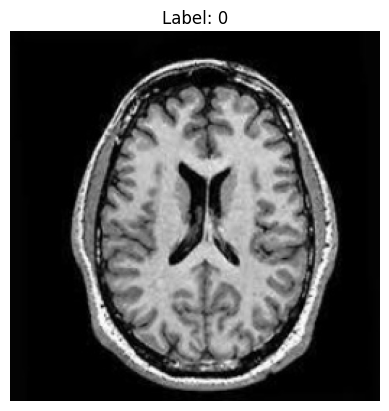

Image_No: 1229


In [5]:
number = random.randint(0, 2999)
image, label = image_set[number]
image = np.transpose(image, (1, 2, 0))

# Display the image in grayscale
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()
print(f"Image_No: {number}")

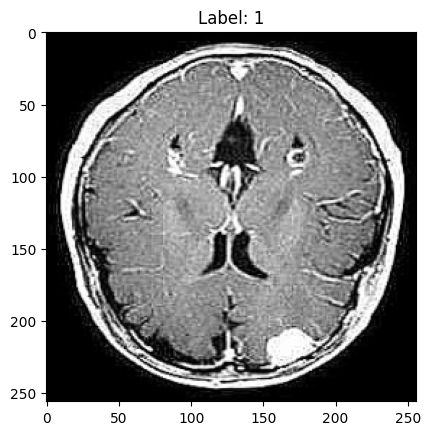

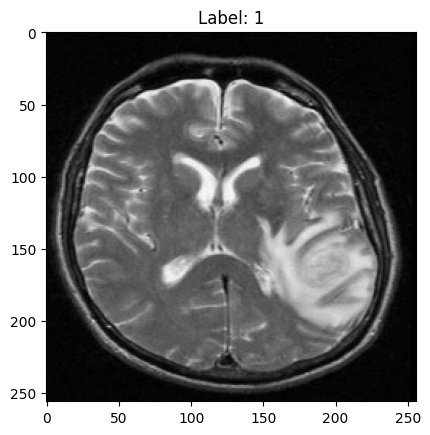

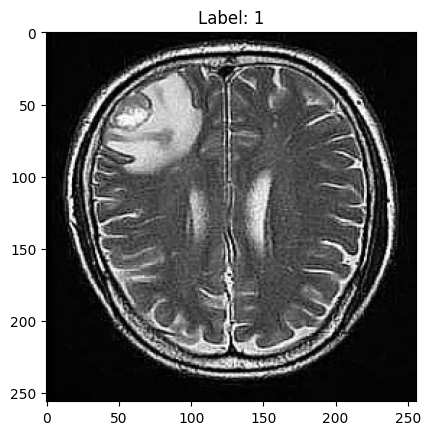

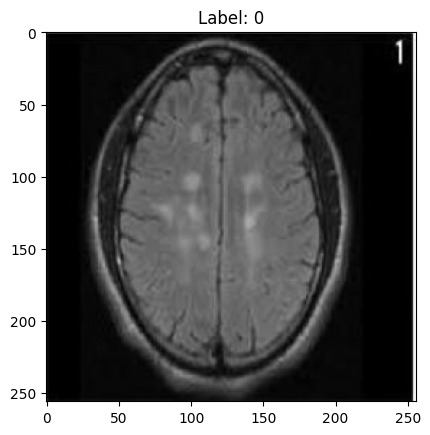

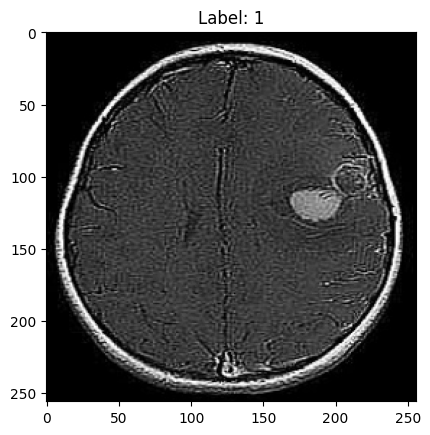

In [6]:
# Display 5 random images from train_loader in original form
# To confirm we have successfully loaded images ready for training
def unnormalize(img):
    img = img.numpy()
    img = np.transpose(img, (1, 2, 0))  # transpose the dimensions
    return img

images, labels = next(iter(train_loader))

# Visualize the first 5 images and their labels
for i in range(5):
    plt.imshow(unnormalize(images[i]), cmap='gray')
    plt.title('Label: {}'.format(labels[i]))
    plt.show()

In [7]:
# pytorch to tensorflow converter, so that data can be read by tf model
def convert_to_numpy(loader):
    data = []
    labels = []
    for batch in loader:
        images, batch_labels = batch
        data.append(images.numpy())
        labels.append(batch_labels.numpy())
    data = np.concatenate(data, axis=0)
    labels = np.concatenate(labels, axis=0)
    # Reshape the data to (batch_size, height, width, channels)
    data = data.reshape(-1, 256, 256, 1)
    return data, labels

x_train, y_train = convert_to_numpy(train_loader)
x_val, y_val = convert_to_numpy(val_loader)
x_test, y_test = convert_to_numpy(test_loader)

# Model construction and training
### This notebook skips these steps

In [8]:
model = Sequential([

# Convolutional layer 1
    Conv2D(32, (3, 3), padding='same', activation = 'relu', input_shape=(256, 256, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

# Convolutional layer 2
    Conv2D(32, (3, 3), padding='same', activation = 'relu', kernel_initializer = 'he_uniform'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),

# Dense layer 1
    Dense(512, activation='relu'),
    Dropout(0.5),

# Dense layer 3 (output)
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     1

In [9]:
history = model.fit(x_train, y_train, epochs = 15, batch_size= 32, validation_data=(x_val, y_val))

Epoch 1/15


2023-03-02 23:56:30.228455: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-02 23:56:31.189369: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x169859c80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-03-02 23:56:31.192704: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-03-02 23:56:31.529812: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 [==============================] - 53s 694ms/step - loss: 1.2371 - accuracy: 0.7513 - val_loss: 1.1219 - val_accuracy: 0.6267
Epoch 2/15
75/75 [==============================] - 49s 656ms/step - loss: 0.3641 - accuracy: 0.8383 - val_loss: 2.1681 - val_accuracy: 0.5867
Epoch 3/15
75/75 [==============================] - 50s 668ms/step - loss: 0.2894 - accuracy: 0.8775 - val_loss: 1.7523 - val_accuracy: 0.6600
Epoch 4/15
75/75 [==============================] - 50s 668ms/step - loss: 0.1640 - accuracy: 0.9296 - val_loss: 1.6425 - val_accuracy: 0.7067
Epoch 5/15
75/75 [==============================] - 61s 811ms/step - loss: 0.1607 - accuracy: 0.9404 - val_loss: 1.1833 - val_accuracy: 0.7867
Epoch 6/15
75/75 [==============================] - 55s 729ms/step - loss: 0.1121 - accuracy: 0.9579 - val_loss: 0.6154 - val_accuracy: 0.8567
Epoch 7/15
75/75 [==============================] - 53s 709ms/step - loss: 0.0567 - accuracy: 0.9817 - val_loss: 0.2063 - val_accuracy: 0.9333
Epoch 8/15

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10/10 [==============================] - 1s 131ms/step - loss: 0.1013 - accuracy: 0.9733
Test loss: 0.10130990296602249
Test accuracy: 0.9733333587646484


In [11]:
# save model to a file
model.save('tumour_detector.h5')

In [ ]:
# read model file for further analysis
model = tf.keras.models.load_model('tumour_detector.h5')

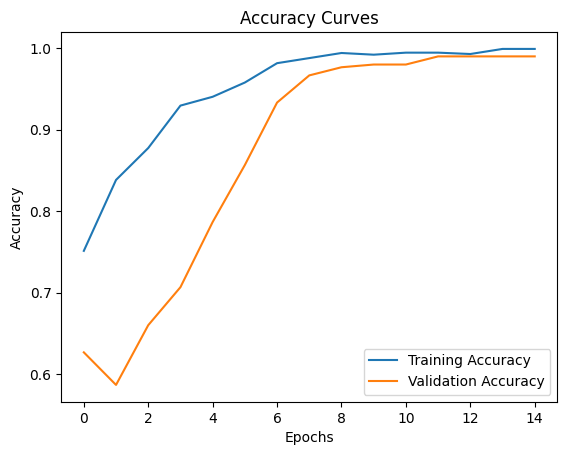

In [12]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy curves
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Visualise CNN confidence on testing dataset
### Bar represents CNN confidence on each of 2 categories

1/1 [==============================] - 0s 90ms/step


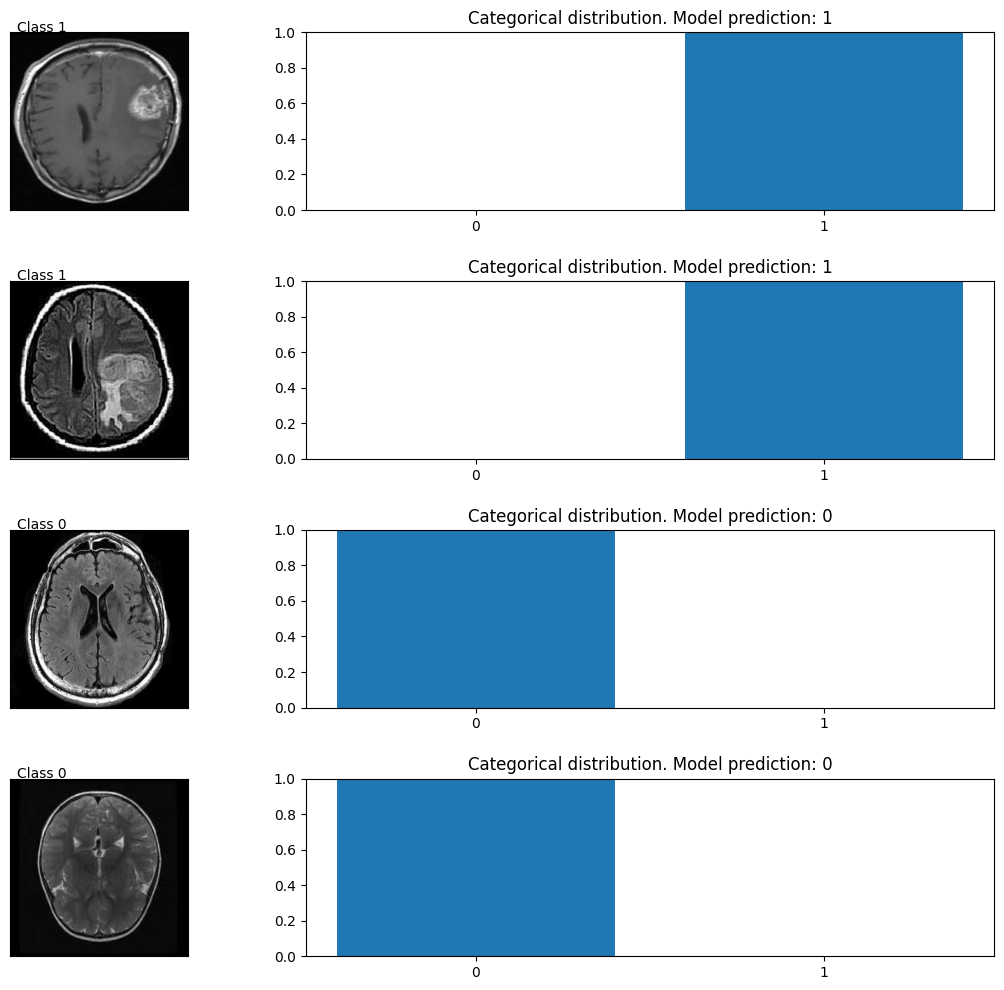

In [13]:
# visualise our model's confidence (decision making) on yes/no categories in several testing images
num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model.predict(random_test_images)
complement = np.ones_like(predictions) - predictions
predictions = np.concatenate((complement, predictions), axis=1)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image), cmap = 'gray')
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Class {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

for ax in axes[:,1]:
    ax.set_ylim([0,1])
    
plt.show()

# Visualise model predictions on the prediction dataset

In [16]:
# Get prediction images from pred_output folder and visualise CNN decision making
from PIL import Image
import os

pred_path = 'Br35H/pred_output'
img_filenames = os.listdir(pred_path)
img_width, img_height = 256, 256

def convert_to_numpy(pred_path, transform):
    img_filenames = os.listdir(pred_path)
    img_width, img_height = 256, 256
    
    # Create a numpy array to store the images:
    imgs = np.zeros((len(img_filenames), img_width, img_height), dtype=np.float32)

    # Loop through the image filenames, load each image, and preprocess it:
    for i, filename in enumerate(img_filenames):
        img = Image.open(os.path.join(pred_path, filename))
        img = transform(img)
        imgs[i] = img
    
    # Reshape the data to (batch_size, height, width, channels)
    imgs = imgs.reshape(-1, img_width, img_height, 1)
    return imgs

pred_imgs = convert_to_numpy(pred_path, transform)

1/1 [==============================] - 0s 39ms/step


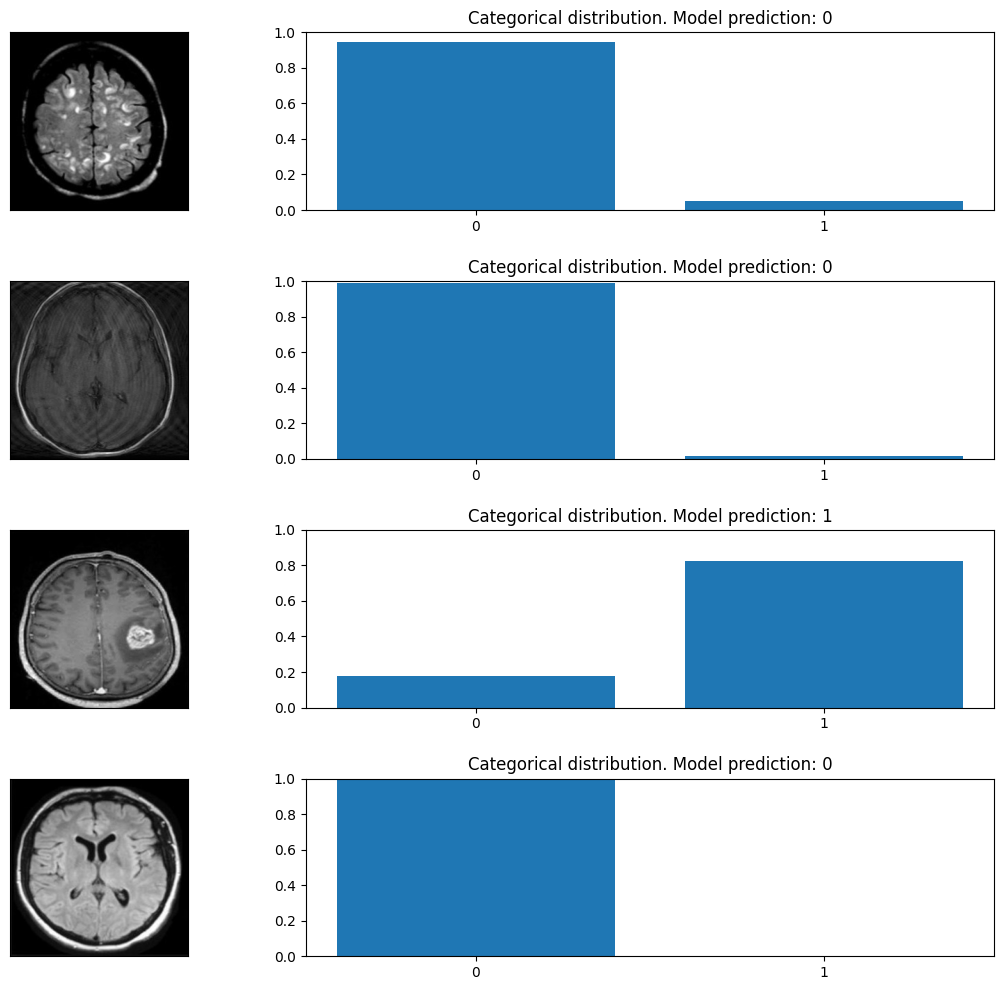

In [18]:
num_test_images = pred_imgs.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = pred_imgs[random_inx, ...]

predictions = model.predict(random_test_images)
complement = np.ones_like(predictions) - predictions
predictions = np.concatenate((complement, predictions), axis=1)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image) in enumerate(zip(predictions, random_test_images)):
    axes[i, 0].imshow(np.squeeze(image), cmap = 'gray')
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

for ax in axes[:,1]:
    ax.set_ylim([0,1])

plt.show()